# Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/Users/kmarkov//Documents/final_df_5_stages_stand.csv")


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['5_stages'])  # Extract features excluding the label column

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

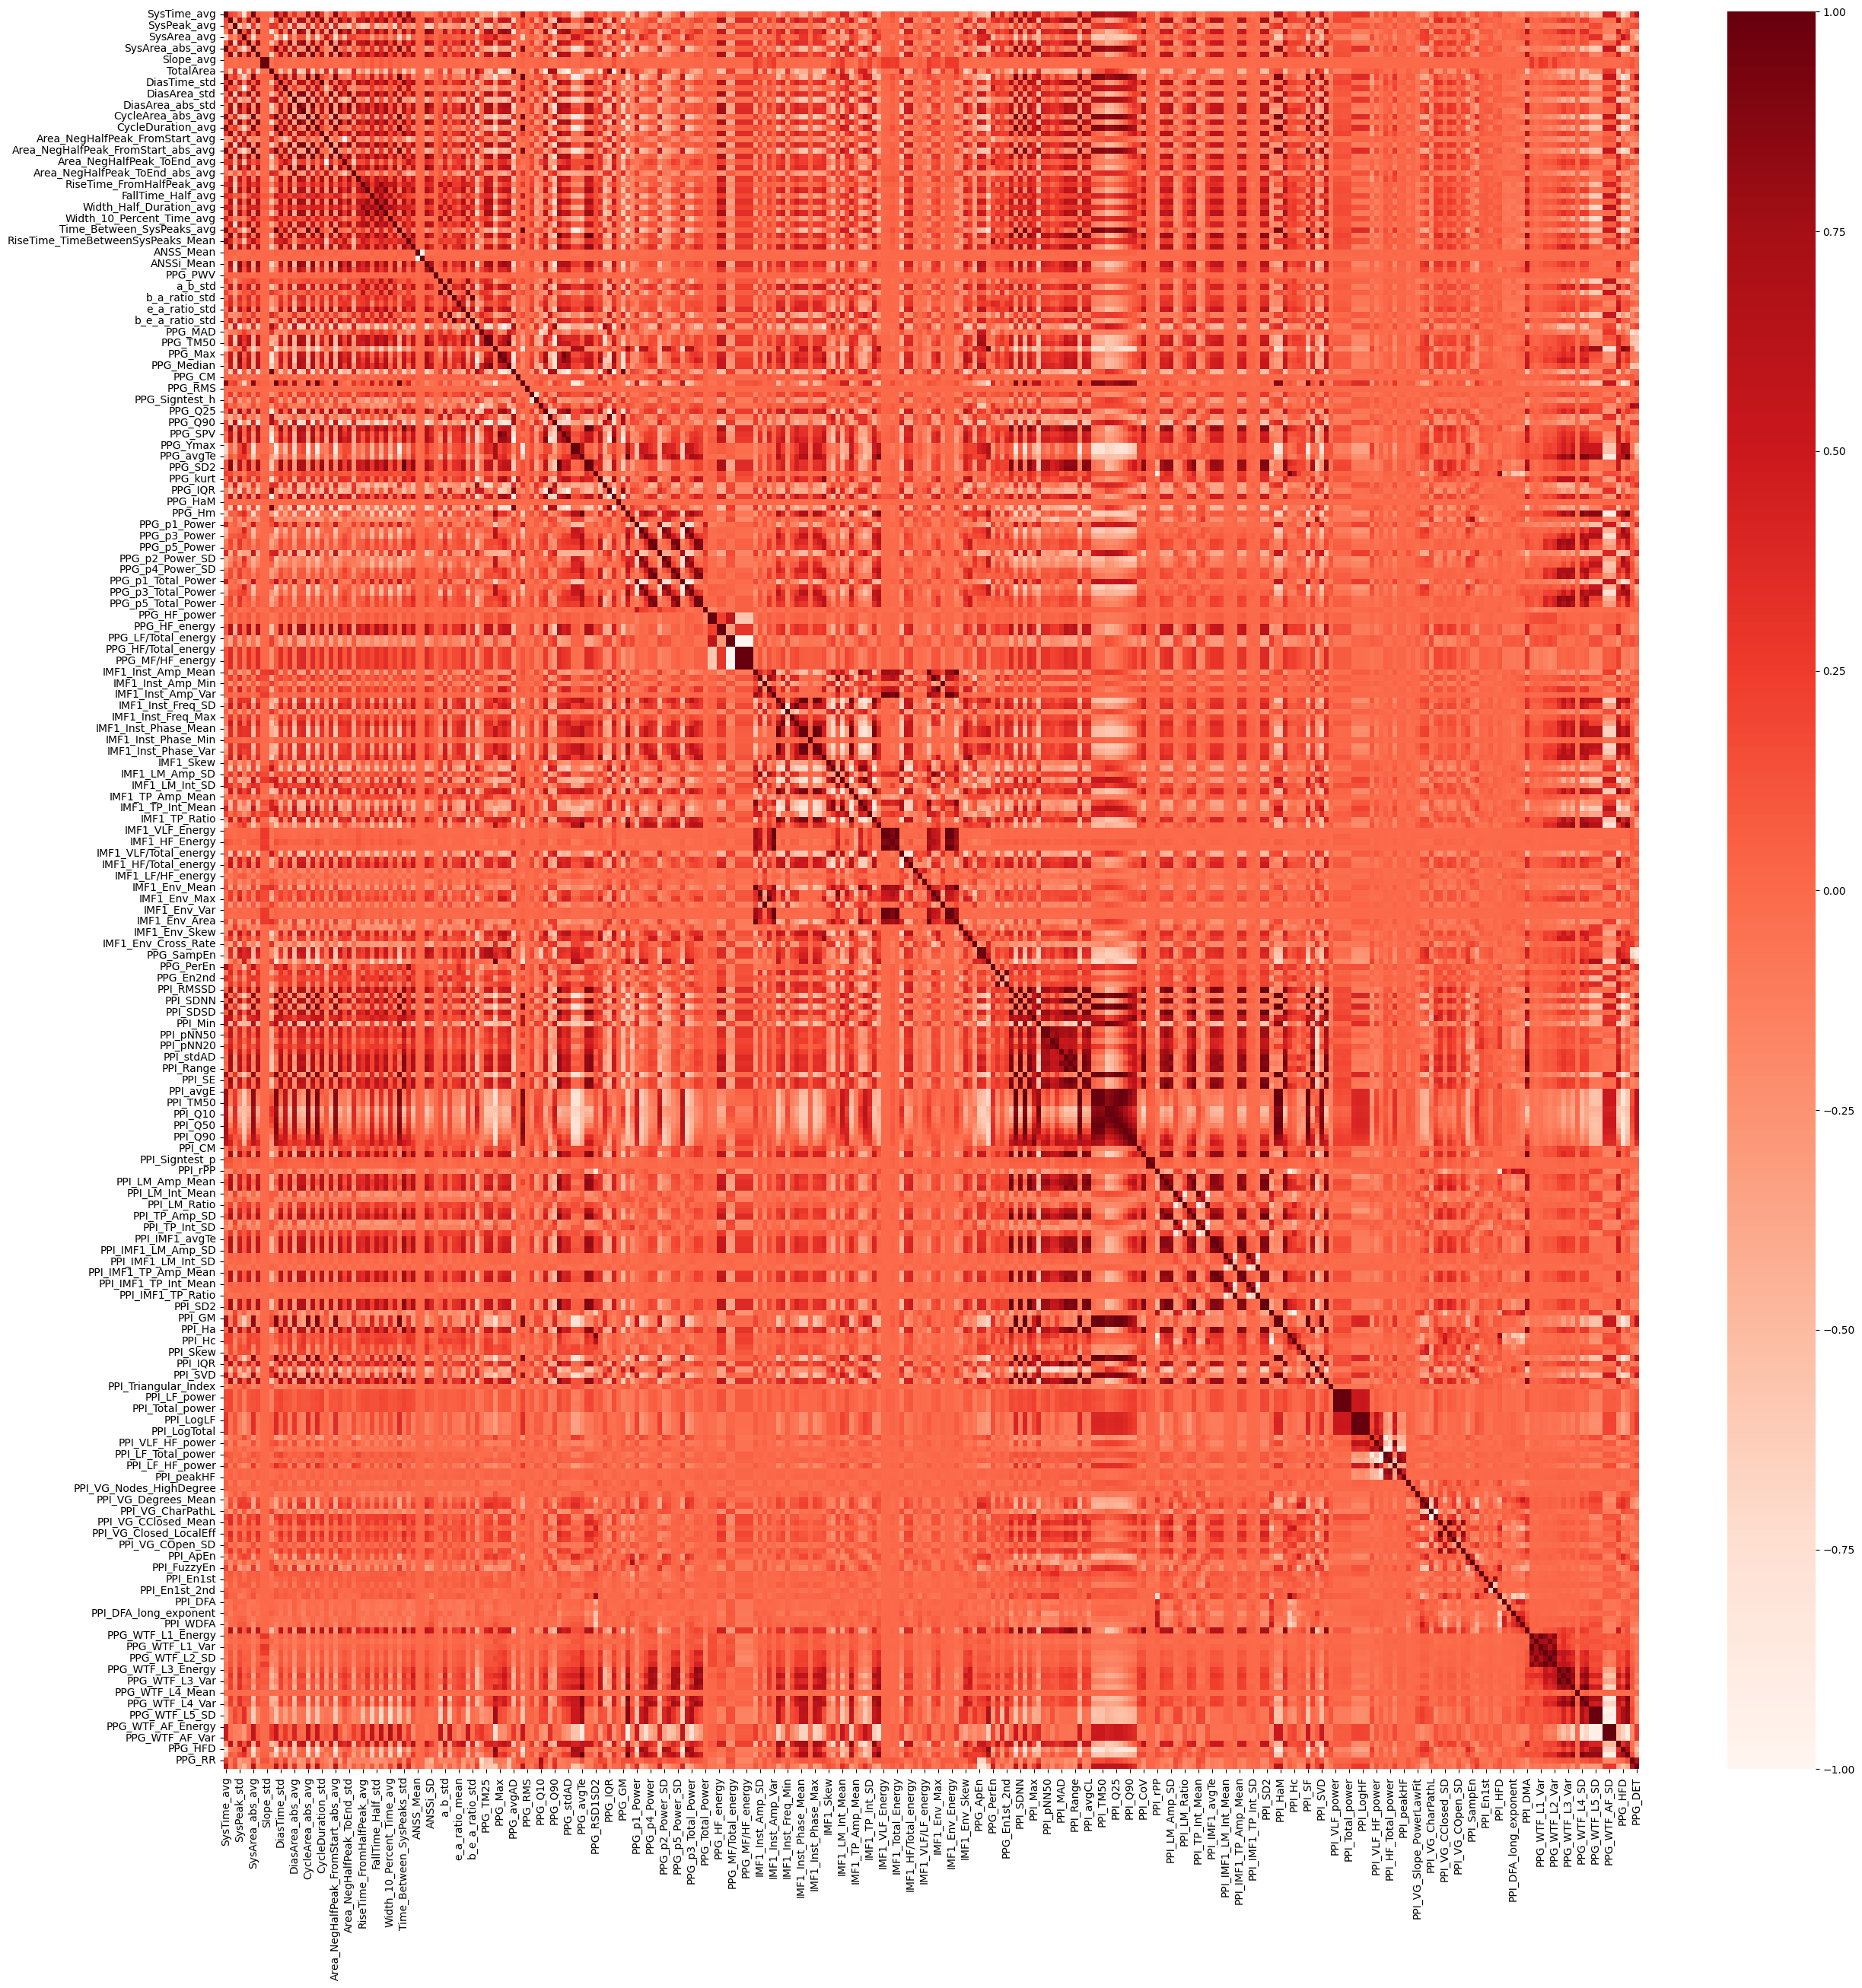

In [4]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [5]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [6]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [7]:
# Check NaNs

nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_peakVLF', 'PPI_peakHF', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 

In [8]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


# Prepare X and y

In [11]:
# Load subjects
df_subjects = pd.read_csv("/Users/kmarkov/Documents/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['5_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['5_stages']
groups = df_revised['SubjectID']


# Feature Selection

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X, y)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg',
       ...
       'PPI_HFD', 'PPI_PDFA', 'PPI_WDFA', 'PPG_WTF_L4_Energy', 'PPG_WTF_L4_SD',
       'PPG_WTF_L5_Energy', 'PPG_LC', 'PPG_HFD', 'PPG_RR', 'PPG_DET'],
      dtype='object', length=103)


In [13]:
X_selected = X[selected_features]
X_selected

,SysTime_avg,SysTime_std,SysPeak_avg,SysArea_avg,SysArea_std,SysArea_abs_avg,Slope_avg,TotalArea,DiasTime_avg,DiasArea_avg,...,PPI_HFD,PPI_PDFA,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0.243075,0.106977,2.051287,-1.285312,14.791261,0.190149,0.129524,20.185956,0.665483,1.261417,...,1.840314,1.408947,1.041127,73.786172,0.544357,469.265490,56.679685,1.596500,0.103262,0.916861
1,0.343277,0.225440,1.927268,2.661957,17.248446,0.190526,0.250397,18.963432,0.897964,-2.347344,...,1.670130,0.518060,1.191702,124.451367,0.706797,986.855721,59.669821,1.481480,0.100278,0.961463
2,0.274200,0.101530,2.242864,0.956881,15.603188,0.206661,0.152634,22.063562,0.709604,-0.729983,...,1.935544,0.171287,0.566286,47.301892,0.435842,452.286898,61.623213,1.512300,0.070013,0.889709
3,0.437240,0.398992,2.824896,-1.905432,15.568619,0.304404,0.299215,21.087311,0.984896,2.499454,...,1.842306,0.499770,0.691065,357.419869,1.197743,748.970794,62.408353,1.531390,0.075477,0.864056
4,0.274282,0.135000,2.913433,1.484555,19.700900,0.274228,0.094563,25.268359,0.757390,-1.118548,...,1.902181,0.976507,1.272573,51.561563,0.455048,495.221854,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85537,0.457332,0.147955,2.894850,0.939364,7.744200,0.444941,0.156556,25.575405,1.111178,-2.118725,...,1.935976,0.614931,0.574621,12.749257,0.226207,291.749987,50.156012,1.312859,0.086904,0.944182
85538,0.418870,0.159254,2.790856,3.364588,9.194997,0.412621,0.245752,25.140178,1.088942,-2.414546,...,2.031091,0.607741,0.574901,14.531636,0.241577,238.542476,51.241862,1.329070,0.086235,0.943974
85539,0.418692,0.121094,2.838916,3.748585,6.014400,0.411671,0.145413,25.719602,1.080729,-6.714564,...,2.028758,0.491286,0.762822,13.286614,0.230992,255.100137,49.838657,1.319159,0.101377,0.951243
85540,0.412946,0.169847,2.848124,2.600567,7.562719,0.405593,0.140956,25.362439,1.034877,-3.052372,...,2.053174,1.020100,1.026078,13.945365,0.236626,336.559393,50.857749,1.367742,0.084736,0.934705


In [46]:
X_selected.columns

Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg',
       ...
       'PPI_HFD', 'PPI_PDFA', 'PPI_WDFA', 'PPG_WTF_L4_Energy', 'PPG_WTF_L4_SD',
       'PPG_WTF_L5_Energy', 'PPG_LC', 'PPG_HFD', 'PPG_RR', 'PPG_DET'],
      dtype='object', length=103)

In [47]:
for column in X_selected.columns:
    print(column)

SysTime_avg
SysTime_std
SysPeak_avg
SysArea_avg
SysArea_std
SysArea_abs_avg
Slope_avg
TotalArea
DiasTime_avg
DiasArea_avg
DiasArea_std
DiasArea_abs_avg
CycleArea_std
CycleArea_abs_avg
Area_NegHalfPeak_FromStart_avg
Area_NegHalfPeak_ToEnd_avg
Area_NegHalfPeak_ToEnd_abs_avg
RiseTime_FromHalfPeak_avg
RiseTime_FromHalfPeak_std
FallTime_Half_avg
FallTime_Half_std
Width_Half_Duration_avg
Width_Half_Duration_std
Width_10_Percent_Time_avg
Width_10_Percent_Time_std
RiseTime_TimeBetweenSysPeaks_Mean
RiseTime_TimeBetweenSysPeaks_SD
ANSS_Mean
a_b_mean
a_b_std
b_a_ratio_mean
b_a_ratio_std
e_a_ratio_mean
e_a_ratio_std
b_e_a_ratio_mean
PPG_Min
PPG_MAD
PPG_TM25
PPG_TM50
PPG_avgCL
PPG_Median
PPG_CM
PPG_Q10
PPG_Q25
PPG_Q75
PPG_Q90
PPG_SDSD
PPG_stdAD
PPG_avgTe
PPG_RSD1SD2
PPG_kurt
PPG_skew
PPG_IQR
PPG_SF
PPG_GM
PPG_p3_Power
PPG_p4_Power
PPG_p3_Power_SD
PPG_p4_Power_SD
PPG_p1_Total_Power
PPG_p2_Total_Power
PPG_p3_Total_Power
PPG_p4_Total_Power
IMF1_Inst_Amp_Mean
IMF1_Inst_Freq_Mean
IMF1_Kurt
IMF1_LM_Amp_M

# Hyperparameter tuning

In [14]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y, groups, test_size=0.5, random_state=42, stratify = y)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 19, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 409}
Best score:  0.11724375089674229


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Define the parameter grid based on the results of random search 
param_grid_rf = {
    'classifier__bootstrap': [False, True],
    'classifier__max_depth': [5, 19],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [2, 3],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__n_estimators': [200, 409, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y, groups=groups),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 19, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 409}
Best score:  0.13647518628385896


In [16]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [False, True],
    'classifier__max_depth': [10, 19],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [2, 3, 4],
    'classifier__min_samples_split': [2, 4],
    'classifier__n_estimators': [200, 409, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y, groups=groups),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best score:  0.13803729011483742


# Train Models

## 5-fold CV

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 5 for a 5-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 2    6169
0    3830
3    3284
4    2938
1    1014
Name: 5_stages, dtype: int64
Test set distribution: 2    5907
3    3958
0    3424
4    2718
1     572
Name: 5_stages, dtype: int64
Test set distribution: 2    6641
3    4086
4    3006
0    2914
1     631
Name: 5_stages, dtype: int64
Test set distribution: 2    6304
3    4789
4    2801
0    2560
1     789
Name: 5_stages, dtype: int64
Test set distribution: 2    5822
3    4311
0    3400
4    3004
1     670
Name: 5_stages, dtype: int64
Accuracy       0.388352
Sensitivity    0.388352
Specificity    0.818020
Precision      0.388352
F1 Score       0.388352
MCC            0.128813
dtype: float64
Accuracy       0.023855
Sensitivity    0.023855
Specificity    0.005853
Precision      0.023855
F1 Score       0.023855
MCC            0.035281
dtype: float64
Final Confusion Matrix:
 [[ 6783     0  8759   311   275]
 [  727     0  2774   114    61]
 [ 4124     0 25117  1177   425]
 [ 2329     0 16954   839   306]
 [ 1610     0 1

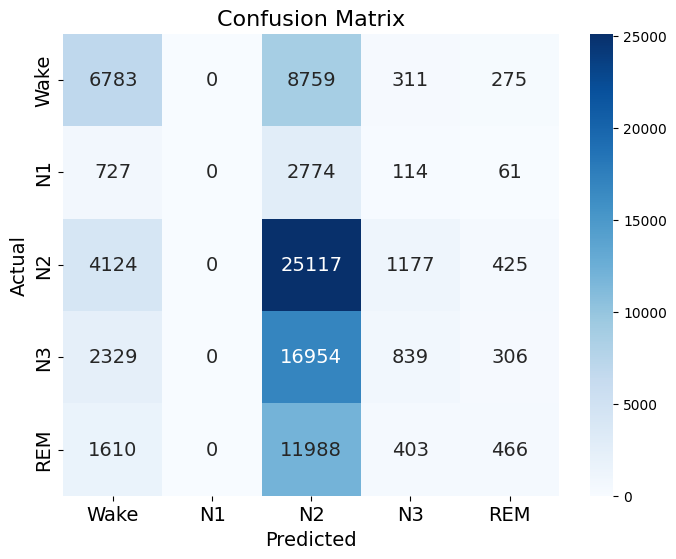

In [19]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [21]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2],
    'Class 3 Importances': average_importances[3],
    'Class 4 Importances': average_importances[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.006610,0.010034,0.011793,0.010363,0.013684,0.010497
1,SysTime_std,0.005290,0.008332,0.007062,0.008050,0.010044,0.007755
2,SysPeak_avg,0.012593,0.007749,0.008634,0.010679,0.009188,0.009769
3,SysArea_avg,0.006329,0.010026,0.008928,0.012770,0.010495,0.009710
4,SysArea_std,0.006737,0.009505,0.006935,0.005831,0.005711,0.006944
...,...,...,...,...,...,...,...
98,PPG_WTF_L5_Energy,0.005962,0.010185,0.006705,0.007800,0.006340,0.007398
99,PPG_LC,0.036553,0.008991,0.013604,0.006795,0.012810,0.015751
100,PPG_HFD,0.010542,0.010649,0.013079,0.013248,0.008033,0.011110
101,PPG_RR,0.005301,0.009094,0.008127,0.006909,0.008357,0.007558


## 10-fold CV

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 2    3129
3    1746
4    1612
0    1548
1     458
Name: 5_stages, dtype: int64
Test set distribution: 2    2833
0    2111
3    1835
4    1419
1     278
Name: 5_stages, dtype: int64
Test set distribution: 2    2986
3    2007
4    1601
0    1448
1     270
Name: 5_stages, dtype: int64
Test set distribution: 2    3224
3    2166
4    1438
0    1017
1     375
Name: 5_stages, dtype: int64
Test set distribution: 3    2764
2    2442
4    1392
0    1352
1     267
Name: 5_stages, dtype: int64
Test set distribution: 2    2714
0    1922
3    1869
4    1208
1     468
Name: 5_stages, dtype: int64
Test set distribution: 2    3059
3    2118
0    1859
4    1490
1     412
Name: 5_stages, dtype: int64
Test set distribution: 2    3568
3    2091
4    1525
0    1415
1     366
Name: 5_stages, dtype: int64
Test set distribution: 2    3168
3    1963
0    1865
4    1344
1     499
Name: 5_stages, dtype: int64
Test set distribution: 2    3720
3    1869
0    1591
4    1438
1     283
Name: 5_s

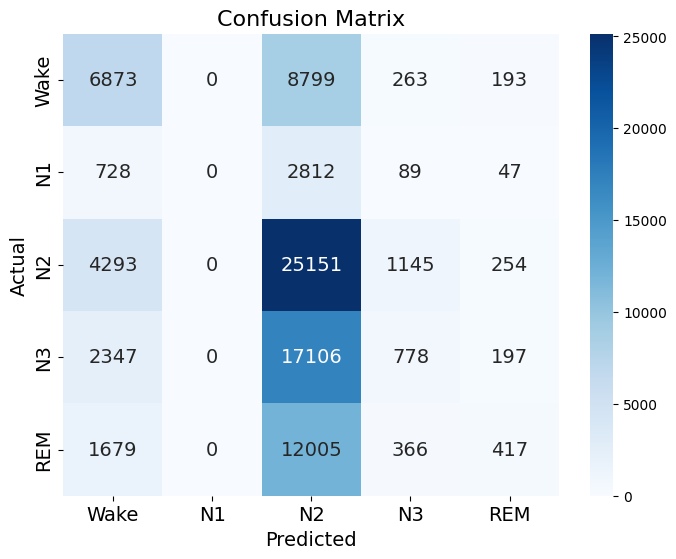

In [23]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 5

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [27]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2],
    'Class 3 Importances': average_importances[3],
    'Class 4 Importances': average_importances[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.006610,0.010034,0.011793,0.010363,0.013684,0.010497
1,SysTime_std,0.005290,0.008332,0.007062,0.008050,0.010044,0.007755
2,SysPeak_avg,0.012593,0.007749,0.008634,0.010679,0.009188,0.009769
3,SysArea_avg,0.006329,0.010026,0.008928,0.012770,0.010495,0.009710
4,SysArea_std,0.006737,0.009505,0.006935,0.005831,0.005711,0.006944
...,...,...,...,...,...,...,...
98,PPG_WTF_L5_Energy,0.005962,0.010185,0.006705,0.007800,0.006340,0.007398
99,PPG_LC,0.036553,0.008991,0.013604,0.006795,0.012810,0.015751
100,PPG_HFD,0.010542,0.010649,0.013079,0.013248,0.008033,0.011110
101,PPG_RR,0.005301,0.009094,0.008127,0.006909,0.008357,0.007558


## 20-fold CV

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 5

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((5, 5), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 2    1717
0    1150
3     733
4     551
1     334
Name: 5_stages, dtype: int64
Test set distribution: 2    1455
0    1314
4     834
3     753
1      98
Name: 5_stages, dtype: int64
Test set distribution: 2    1656
3    1004
0     830
4     728
1      57
Name: 5_stages, dtype: int64
Test set distribution: 2    1511
3    1255
4     867
0     402
1     126
Name: 5_stages, dtype: int64
Test set distribution: 3    1409
0     992
2     986
4     674
1      88
Name: 5_stages, dtype: int64
Test set distribution: 2    1353
0    1140
3     847
4     517
1     210
Name: 5_stages, dtype: int64
Test set distribution: 2    1525
0    1297
3     999
4     768
1     194
Name: 5_stages, dtype: int64
Test set distribution: 2    1555
3     953
0     842
4     608
1      99
Name: 5_stages, dtype: int64
Test set distribution: 2    1733
3    1184
0    1064
4     681
1     157
Name: 5_stages, dtype: int64
Test set distribution: 2    1725
0    1303
3     859
4     578
1     250
Name: 5_s

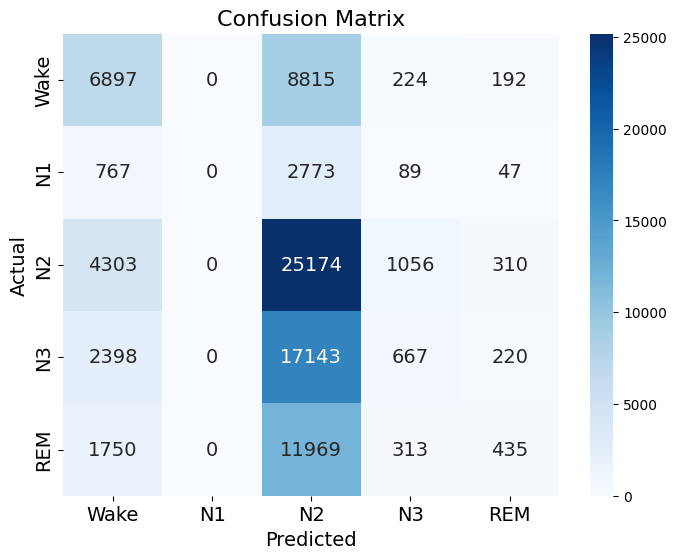

In [29]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], yticklabels=['Wake', 'N1', 'N2', 'N3', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [31]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2],
    'Class 3 Importances': average_importances_cv20[3],
    'Class 4 Importances': average_importances_cv20[4]
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances', 'Class 4 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20


,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Class 4 Importances,Overall Importance (Mean)
0,SysTime_avg,0.006540,0.011177,0.011929,0.010364,0.013612,0.010724
1,SysTime_std,0.005215,0.008752,0.006950,0.008290,0.010238,0.007889
2,SysPeak_avg,0.012114,0.007298,0.009195,0.011130,0.009230,0.009793
3,SysArea_avg,0.006054,0.010264,0.008933,0.013286,0.010513,0.009810
4,SysArea_std,0.006310,0.009662,0.006896,0.005742,0.005725,0.006867
...,...,...,...,...,...,...,...
98,PPG_WTF_L5_Energy,0.005957,0.010125,0.006491,0.007670,0.006079,0.007264
99,PPG_LC,0.038874,0.008898,0.014550,0.006454,0.014012,0.016557
100,PPG_HFD,0.010323,0.010204,0.013302,0.012866,0.007721,0.010883
101,PPG_RR,0.005192,0.009262,0.008097,0.007071,0.007902,0.007505


# Feature Importances

In [32]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)
merged_df['Class 3 Average'] = merged_df[['Class 3 Importances_cv10', 'Class 3 Importances_cv5', 'Class 3 Importances']].mean(axis=1)
merged_df['Class 4 Average'] = merged_df[['Class 4 Importances_cv10', 'Class 4 Importances_cv5', 'Class 4 Importances']].mean(axis=1)


# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Class 4 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Class 4 Average', 'Overall Importance (Mean)']]
final_df

,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Class 3 Average,Class 4 Average,Overall Importance (Mean)
0,SysTime_avg,0.006587,0.010415,0.011839,0.010363,0.013660,0.010573
1,SysTime_std,0.005265,0.008472,0.007024,0.008130,0.010109,0.007800
2,SysPeak_avg,0.012433,0.007599,0.008821,0.010830,0.009202,0.009777
3,SysArea_avg,0.006238,0.010106,0.008929,0.012942,0.010501,0.009743
4,SysArea_std,0.006594,0.009557,0.006922,0.005801,0.005715,0.006918
...,...,...,...,...,...,...,...
98,PPG_WTF_L5_Energy,0.005960,0.010165,0.006634,0.007757,0.006253,0.007354
99,PPG_LC,0.037327,0.008960,0.013919,0.006681,0.013210,0.016020
100,PPG_HFD,0.010469,0.010501,0.013153,0.013121,0.007929,0.011034
101,PPG_RR,0.005264,0.009150,0.008117,0.006963,0.008205,0.007540


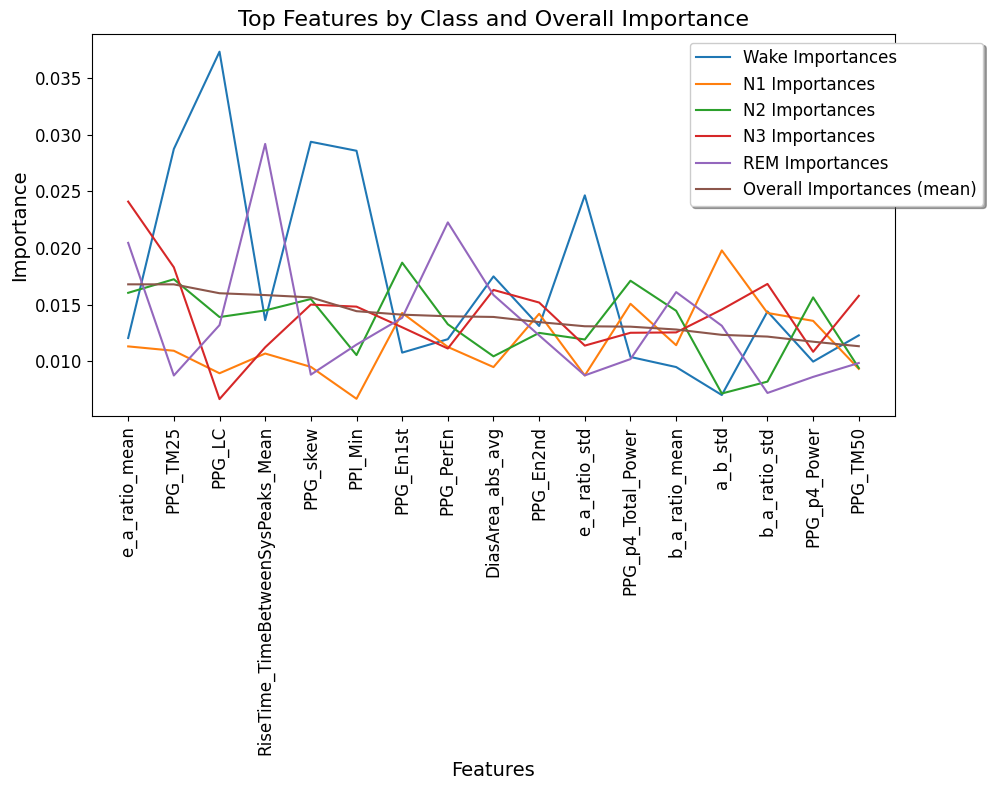

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_class_3 = final_df.nlargest(5, 'Class 3 Average')['Feature']
top_class_4 = final_df.nlargest(5, 'Class 4 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_class_3, top_class_4, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['N1 Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['N2 Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['N3 Importances' if label == 'Class 3 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 4 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [34]:
# Select the top 5 features for each class and overall
top_features_class_0 = final_df.nlargest(5, 'Class 0 Average')
top_features_class_1 = final_df.nlargest(5, 'Class 1 Average')
top_features_class_2 = final_df.nlargest(5, 'Class 2 Average')
top_features_class_3 = final_df.nlargest(5, 'Class 3 Average')
top_features_class_4 = final_df.nlargest(5, 'Class 4 Average')
top_features_overall = final_df.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_class_3 = top_features_class_3.reset_index()
top_features_class_4 = top_features_class_4.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Average'], value_name='Importance'),
    top_features_class_1.assign(Class='N1').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Average'], value_name='Importance'),
    top_features_class_2.assign(Class='N2').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Average'], value_name='Importance'),
    top_features_class_3.assign(Class='N3').melt(id_vars=['Feature', 'Class'], value_vars=['Class 3 Average'], value_name='Importance'),
    top_features_class_4.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 4 Average'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



,Feature,Class,variable,Importance,Overall Importance (Mean)
3,e_a_ratio_mean,N2,Class 2 Average,0.016057,0.016805
0,e_a_ratio_mean,N3,Class 3 Average,0.024103,0.016805
2,e_a_ratio_mean,REM,Class 4 Average,0.020463,0.016805
0,e_a_ratio_mean,Overall,Overall Importance (Mean),0.016805,0.016805
2,PPG_TM25,Wake,Class 0 Average,0.028747,0.016803
1,PPG_TM25,N2,Class 2 Average,0.017253,0.016803
1,PPG_TM25,N3,Class 3 Average,0.018307,0.016803
1,PPG_TM25,Overall,Overall Importance (Mean),0.016803,0.016803
0,PPG_LC,Wake,Class 0 Average,0.037327,0.016020
2,PPG_LC,Overall,Overall Importance (Mean),0.016020,0.016020


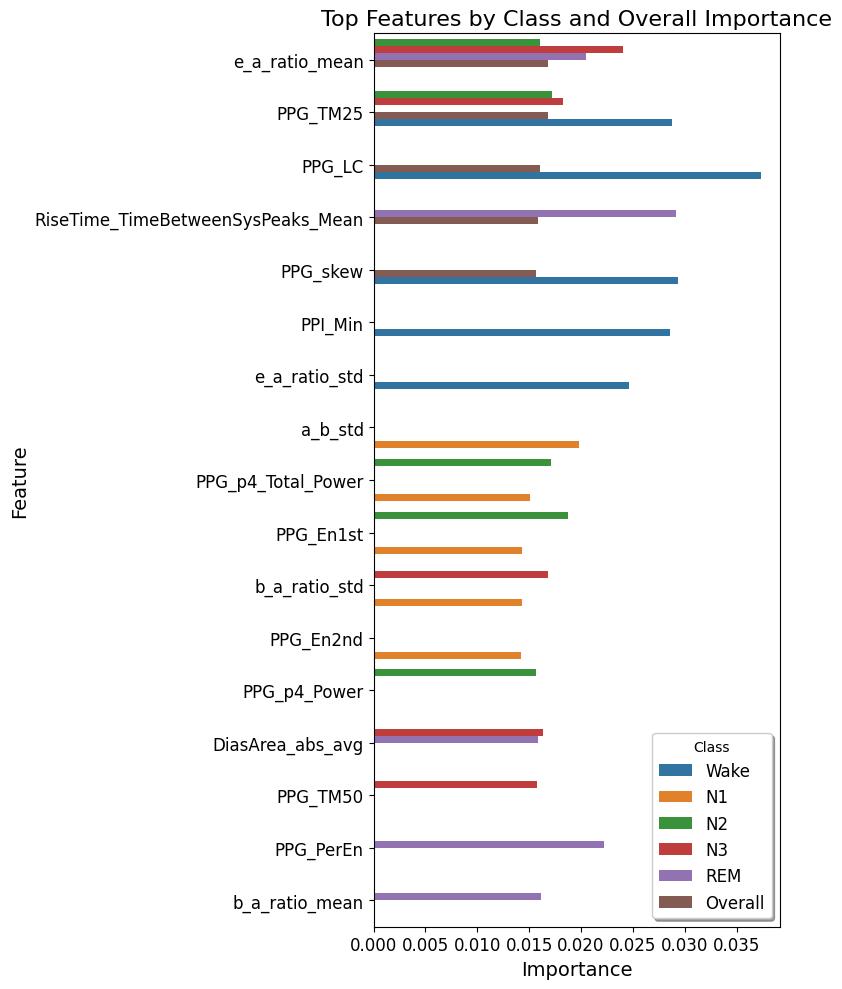

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
# Define the custom palette using seaborn's "deep" palette
deep_palette = sns.color_palette()
custom_palette = {
    'Wake': deep_palette[0],  # Blue
    'N1': deep_palette[1],  # Orange
    'N2': deep_palette[2],  # Green
    'N3': deep_palette[3],  # Green
    'REM': deep_palette[4],  # Red
    'Overall': deep_palette[5]  # Purple
}

plt.figure(figsize=(8, 10))
barplot = sns.barplot(
    data=top_features_combined_sorted,
    x='Importance',
    y='Feature',
    hue='Class',
    palette=custom_palette
)
# Improve the aesthetics and legibility of the plot
plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'N1', 'N2', 'N3', 'REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

In [36]:
feature_names = top_features_combined_sorted['Feature'].unique()

In [37]:
feature_names

array(['e_a_ratio_mean', 'PPG_TM25', 'PPG_LC',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'PPG_skew', 'PPI_Min',
       'e_a_ratio_std', 'a_b_std', 'PPG_p4_Total_Power', 'PPG_En1st',
       'b_a_ratio_std', 'PPG_En2nd', 'PPG_p4_Power', 'DiasArea_abs_avg',
       'PPG_TM50', 'PPG_PerEn', 'b_a_ratio_mean'], dtype=object)

In [39]:
top_features = X[['e_a_ratio_mean', 'PPG_TM25', 'PPG_LC',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'PPG_skew', 'PPI_Min',
       'e_a_ratio_std', 'a_b_std', 'PPG_p4_Total_Power', 'PPG_En1st',
       'b_a_ratio_std', 'PPG_En2nd', 'PPG_p4_Power', 'DiasArea_abs_avg',
       'PPG_TM50', 'PPG_PerEn', 'b_a_ratio_mean']]

C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_35056\2199068784.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = y  # Add the class labels


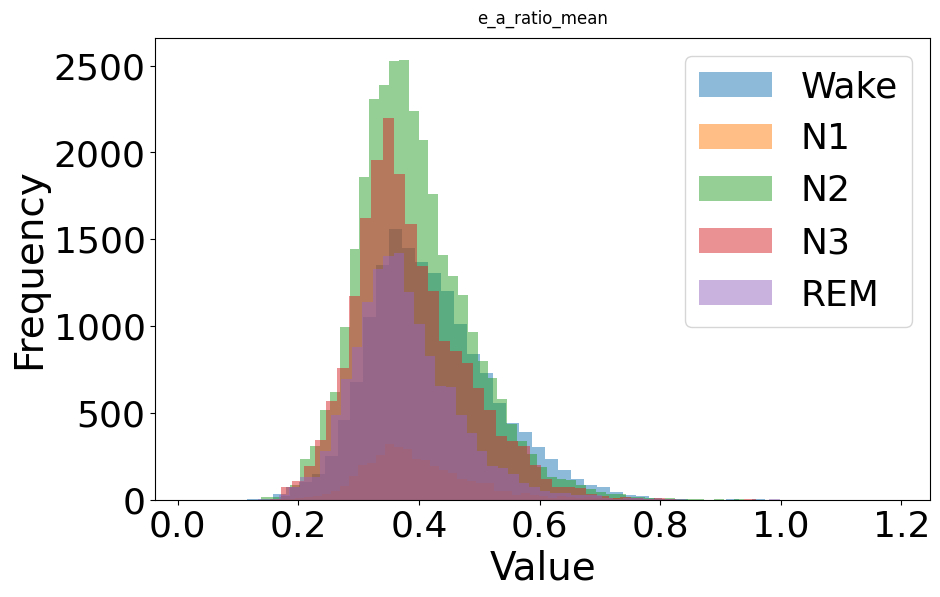

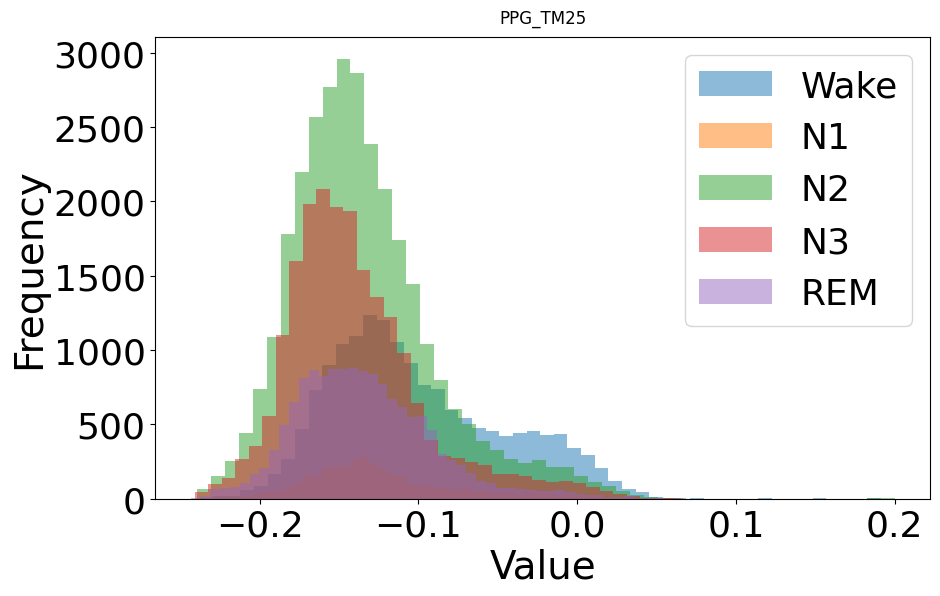

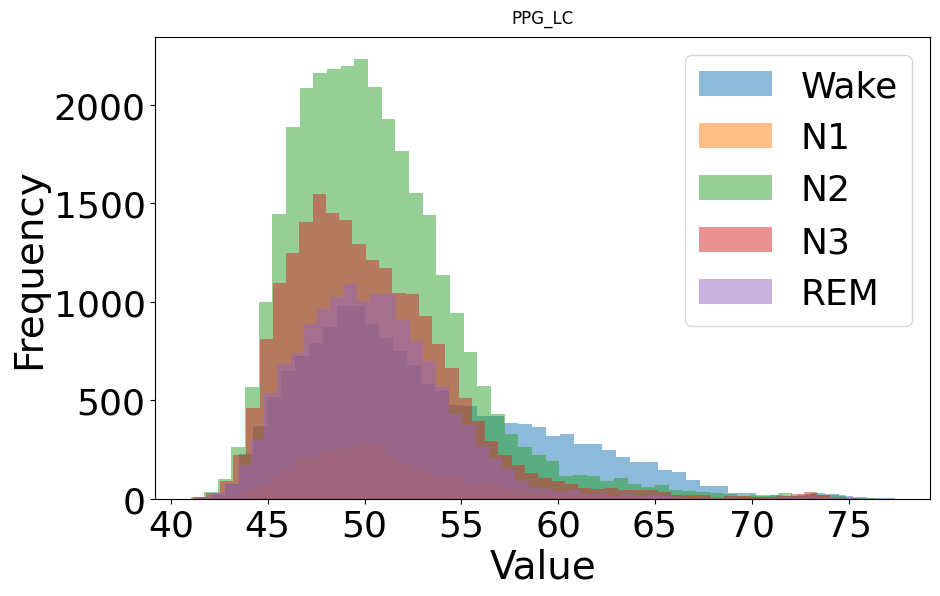

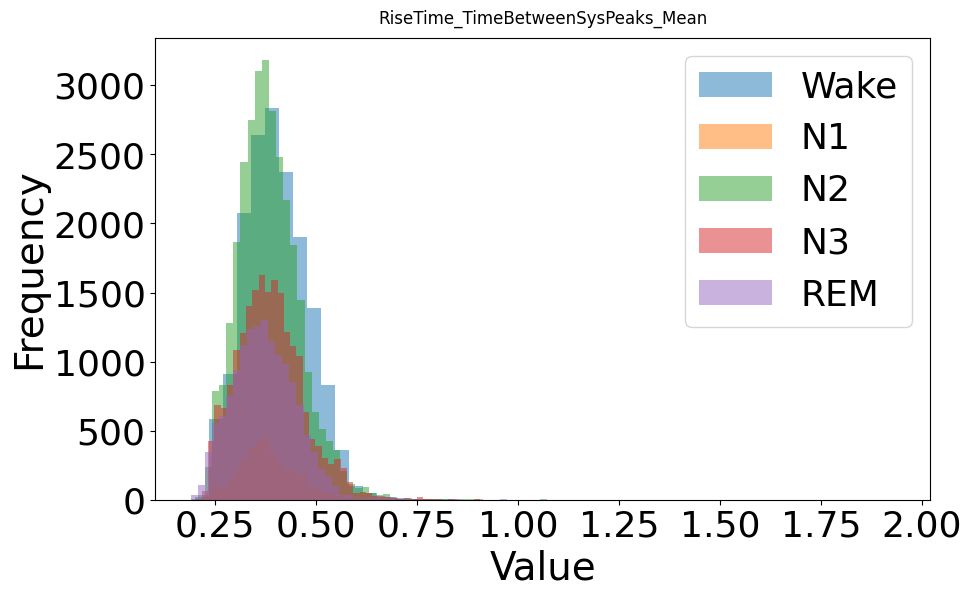

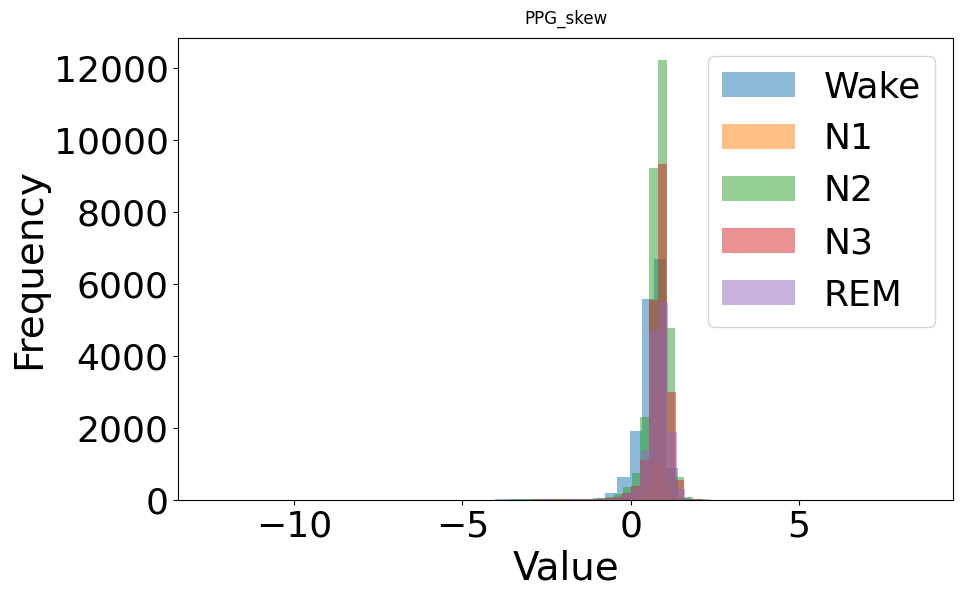

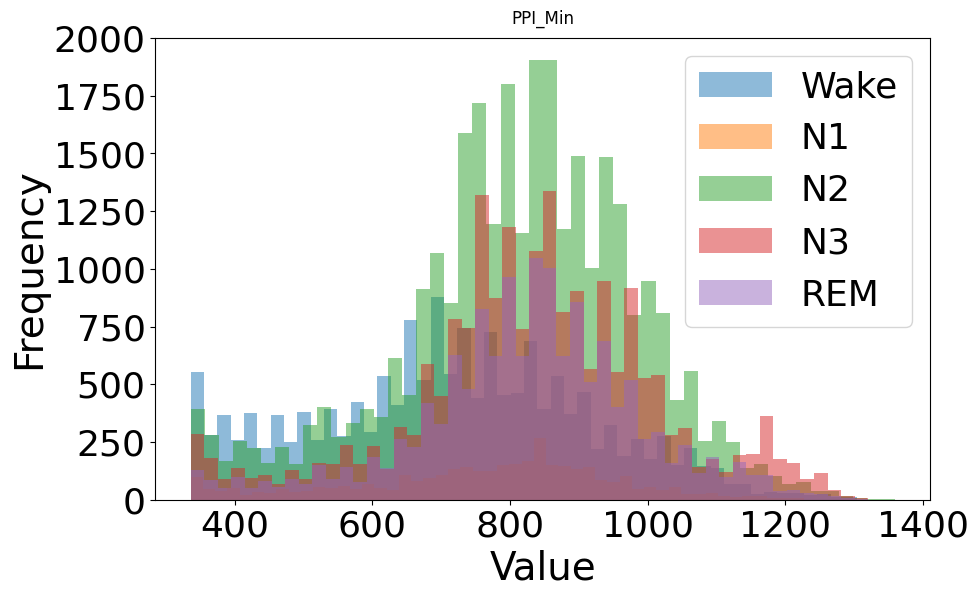

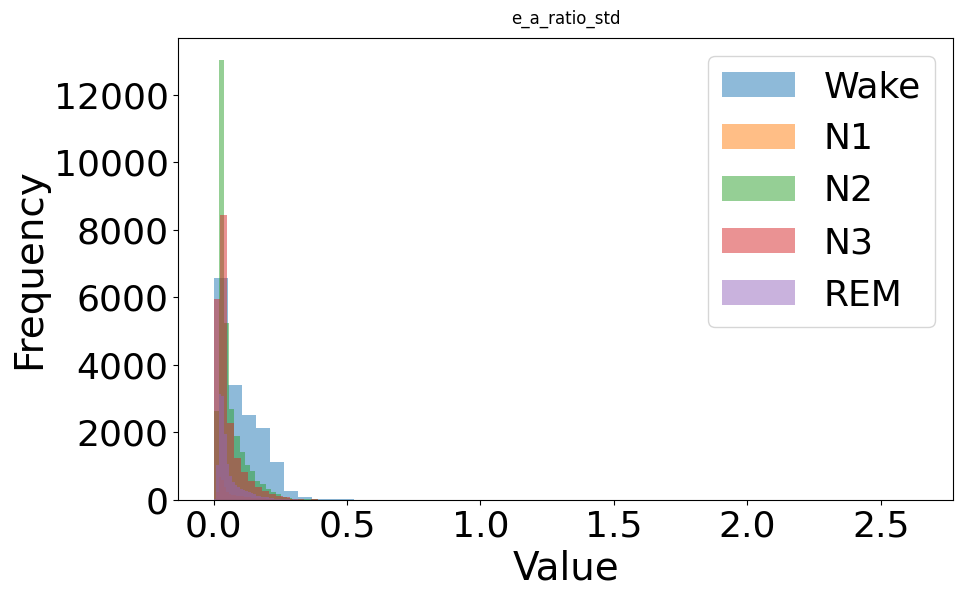

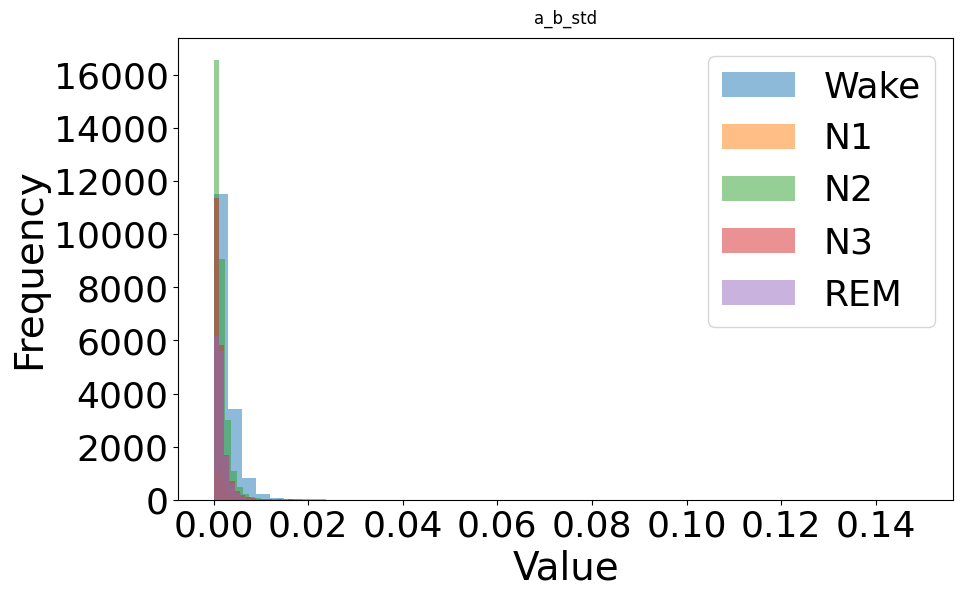

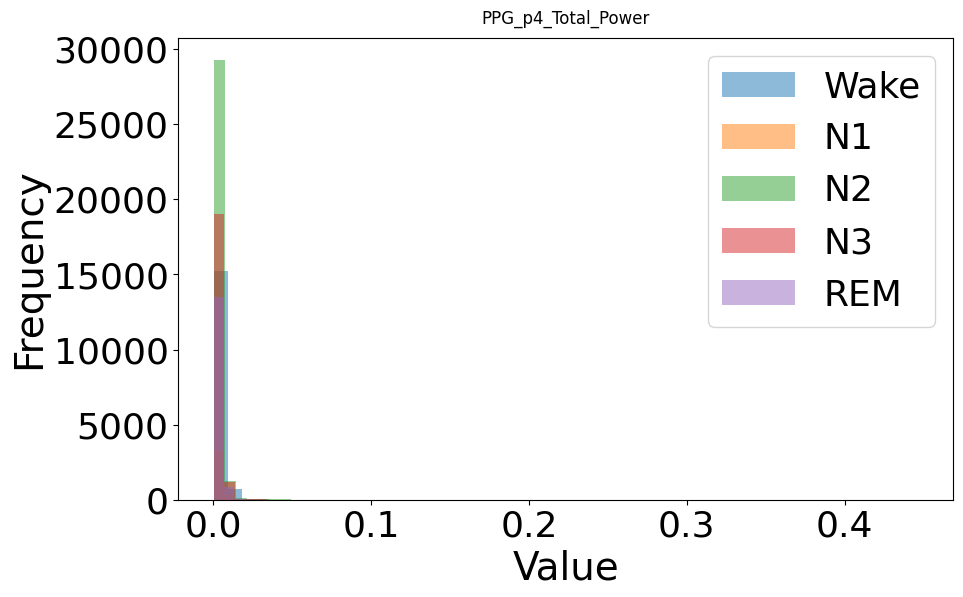

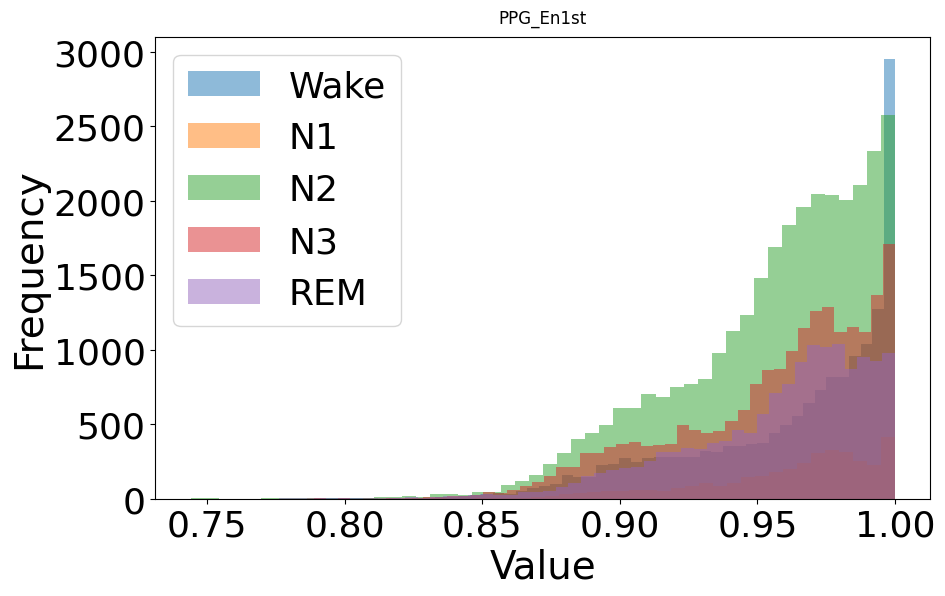

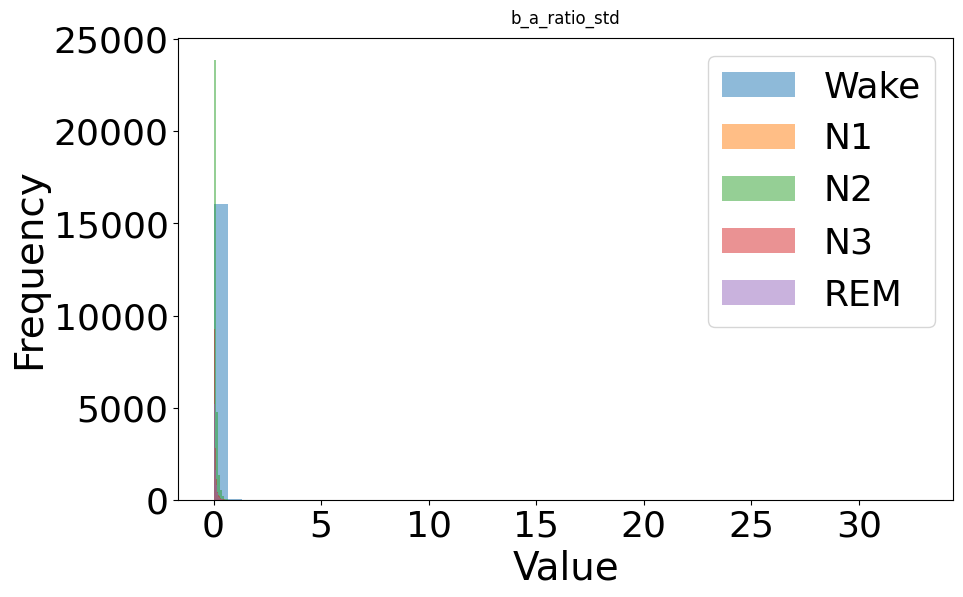

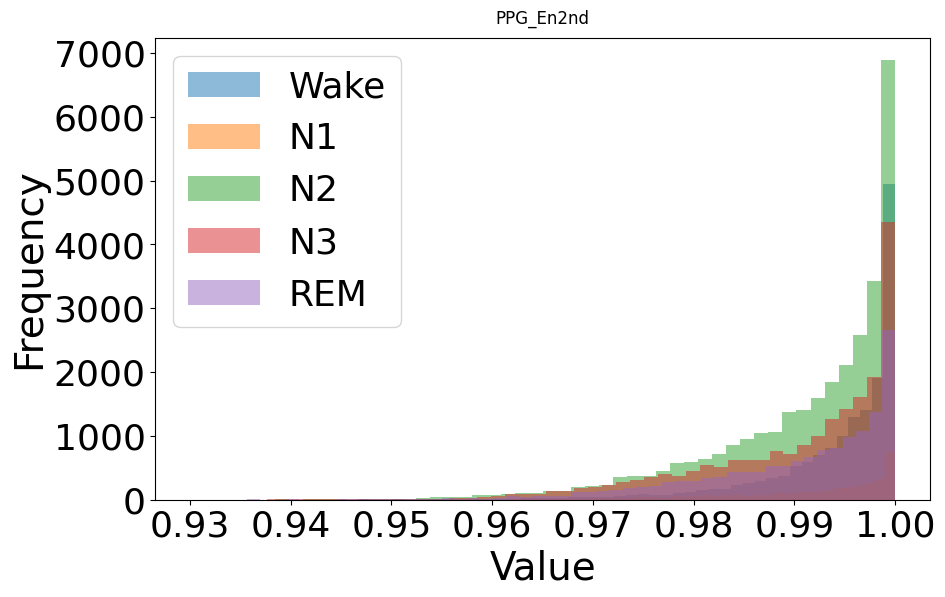

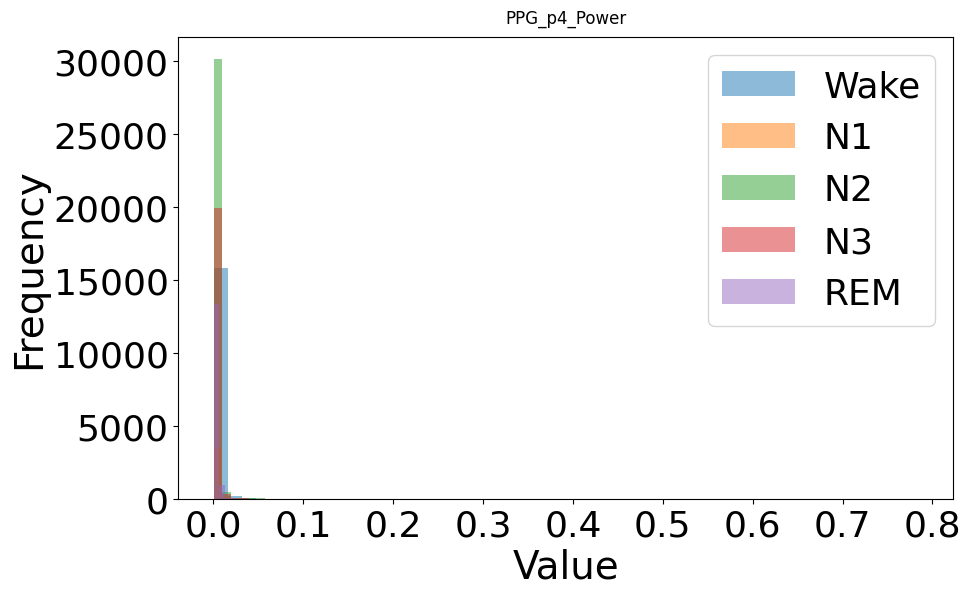

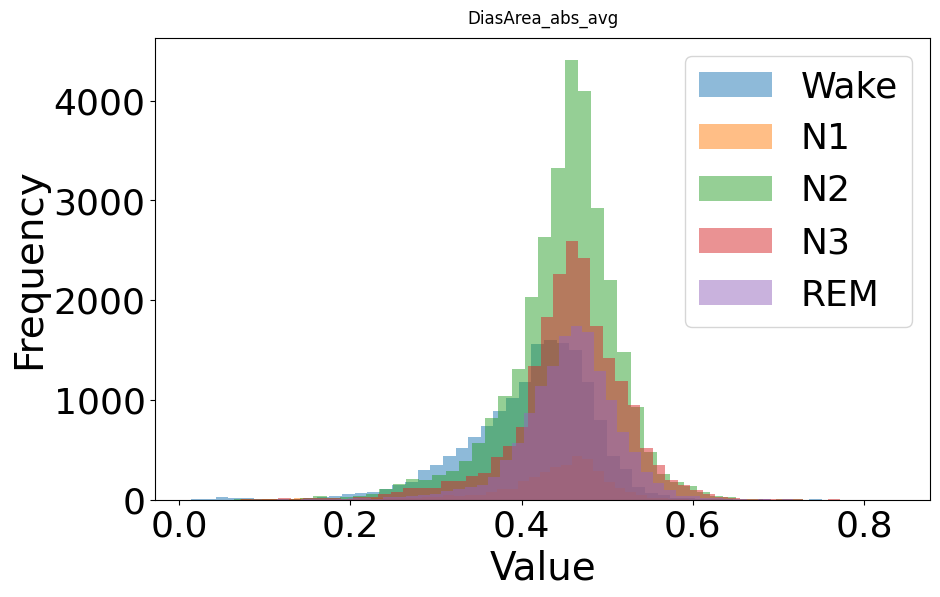

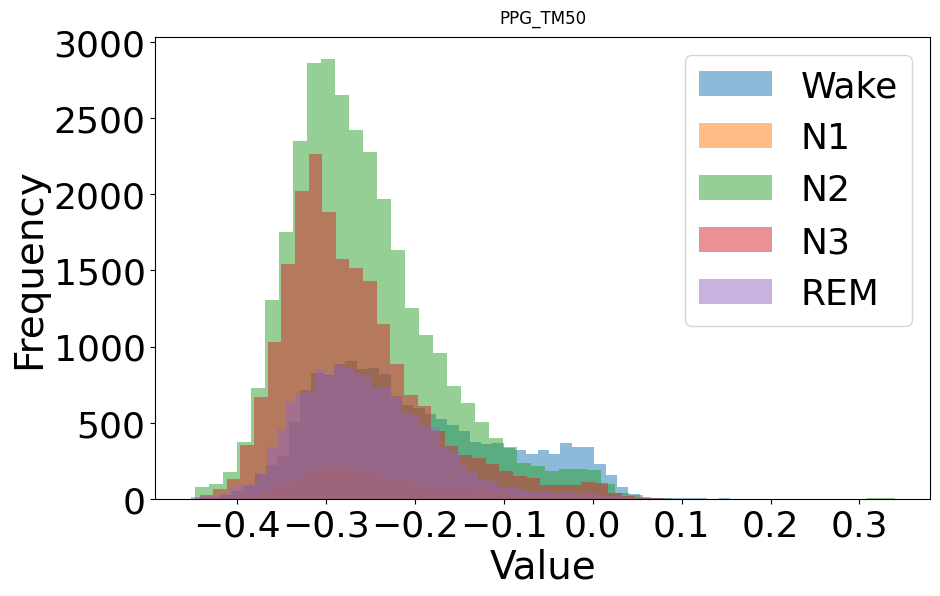

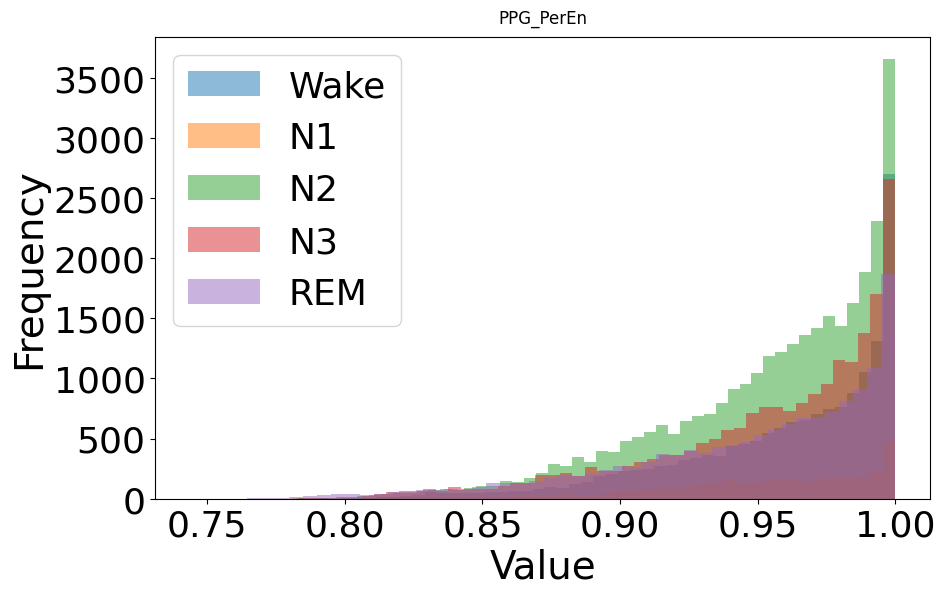

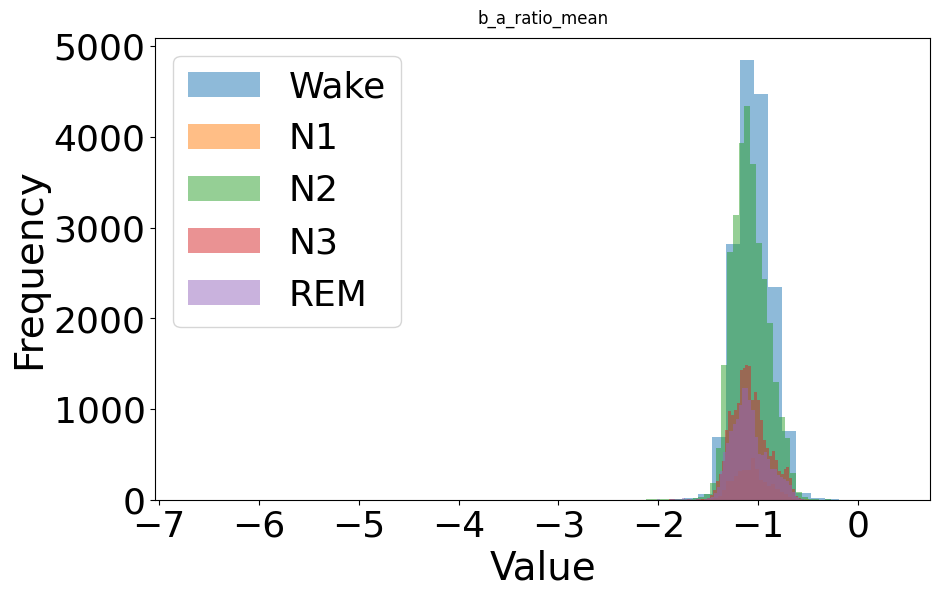

In [42]:
# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM"
}

# Plot histograms for each feature
# Assuming 'top_features' DataFrame and 'y_resampled' Series are already defined
top_features['class'] = y  # Add the class labels

# Exclude the 'class' column when getting feature names
feature_names = top_features.drop(columns='class').columns

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Get unique class values from the 'class' column
    for class_value in np.unique(top_features['class']):
        # Subset the data for the current class
        subset = top_features[top_features['class'] == class_value]
        # Plot histogram and use the class_labels dictionary to get the correct label
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}', pad = 10)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.legend(fontsize = 26)
    plt.yticks (fontsize = 26)
    plt.xticks (fontsize = 26)
    plt.show()


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_35056\3474421010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = top_features['class'].map(class_mapping)


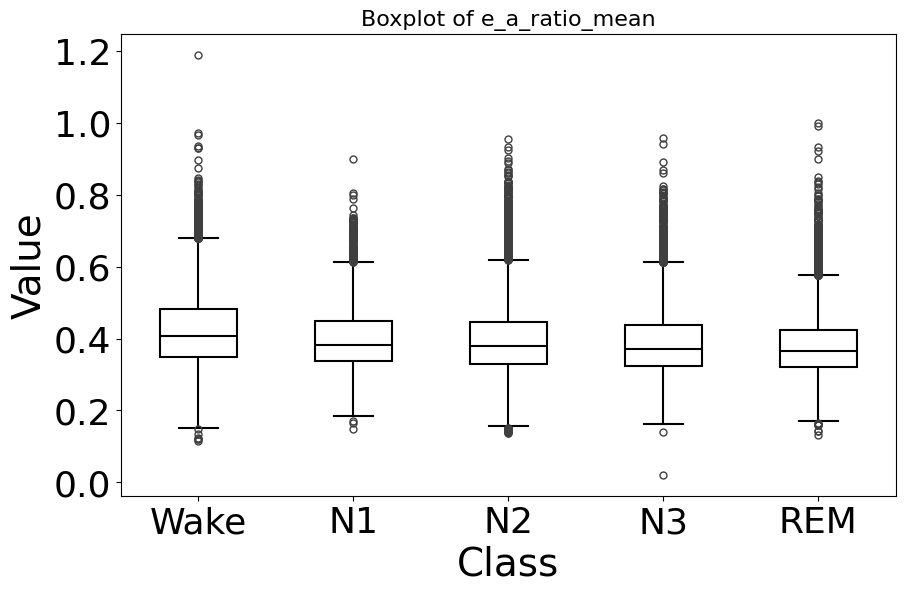

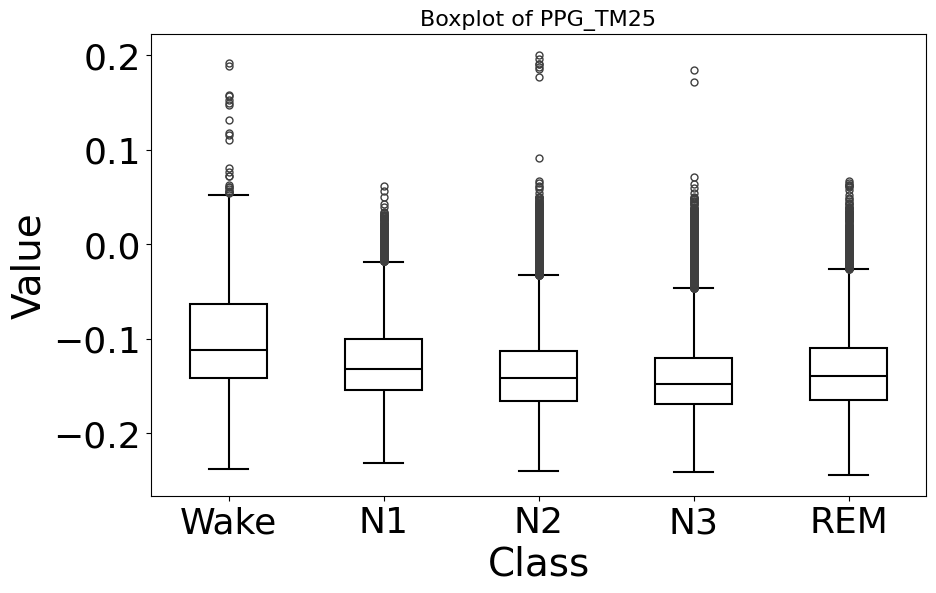

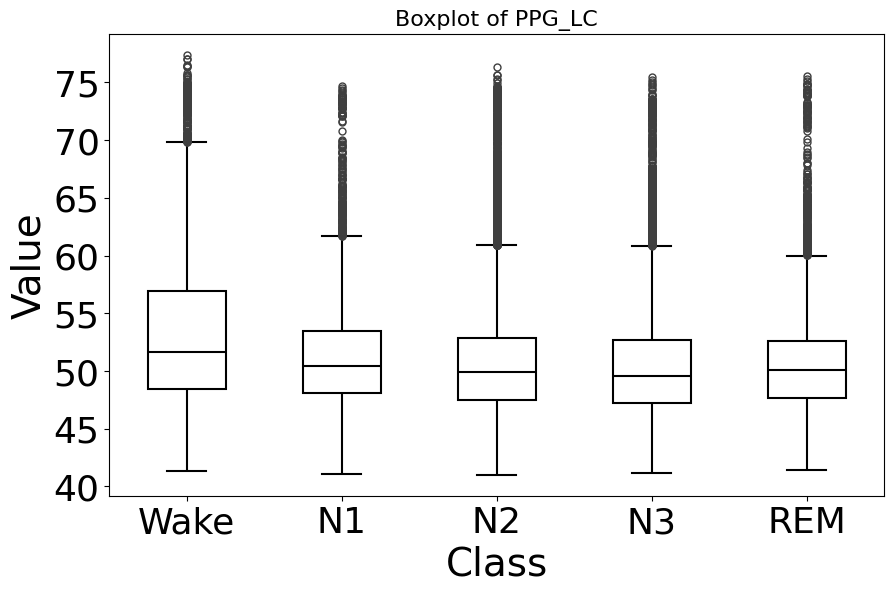

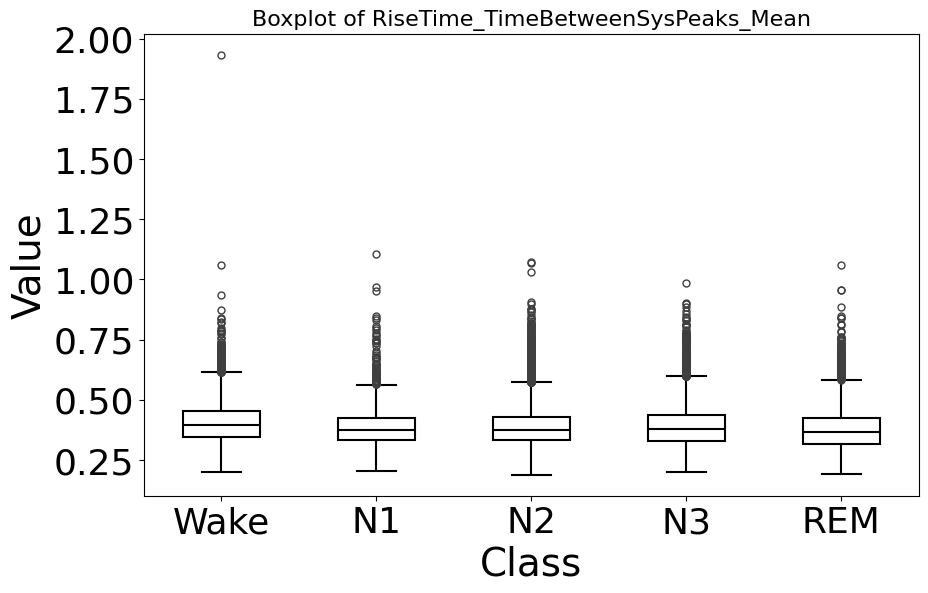

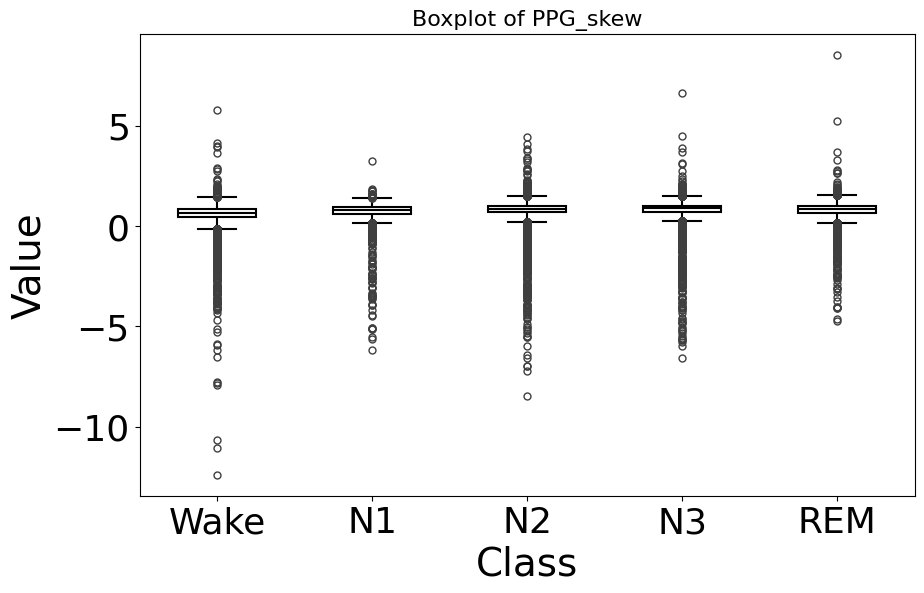

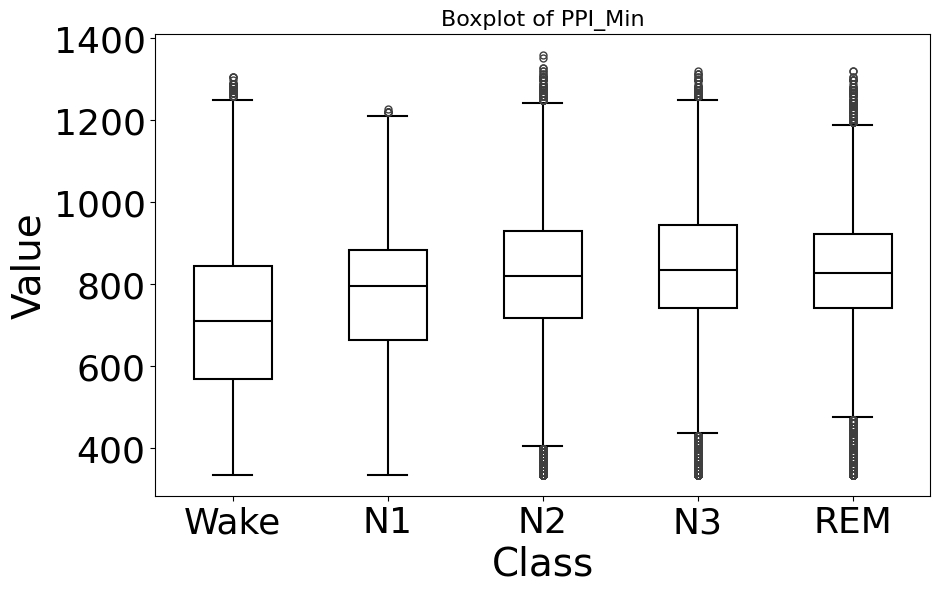

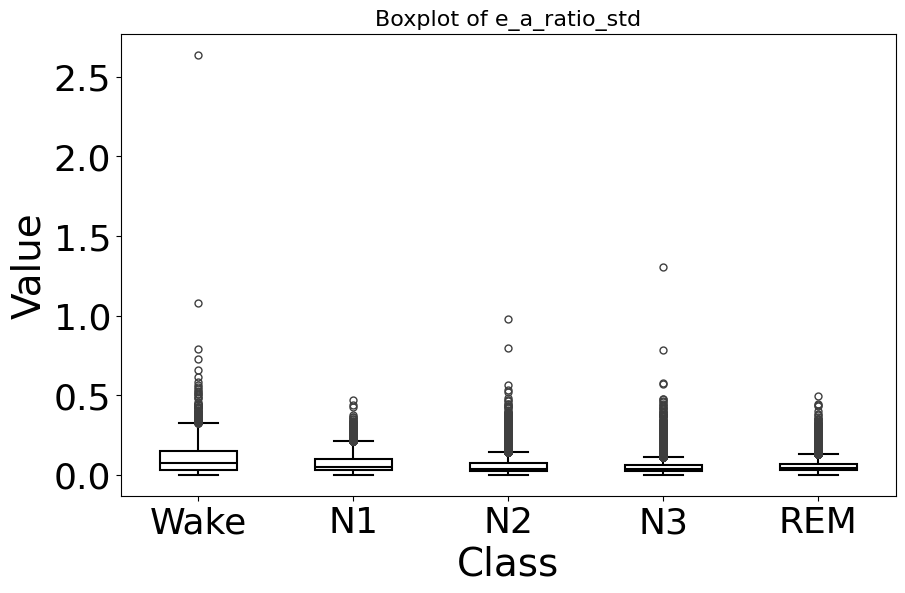

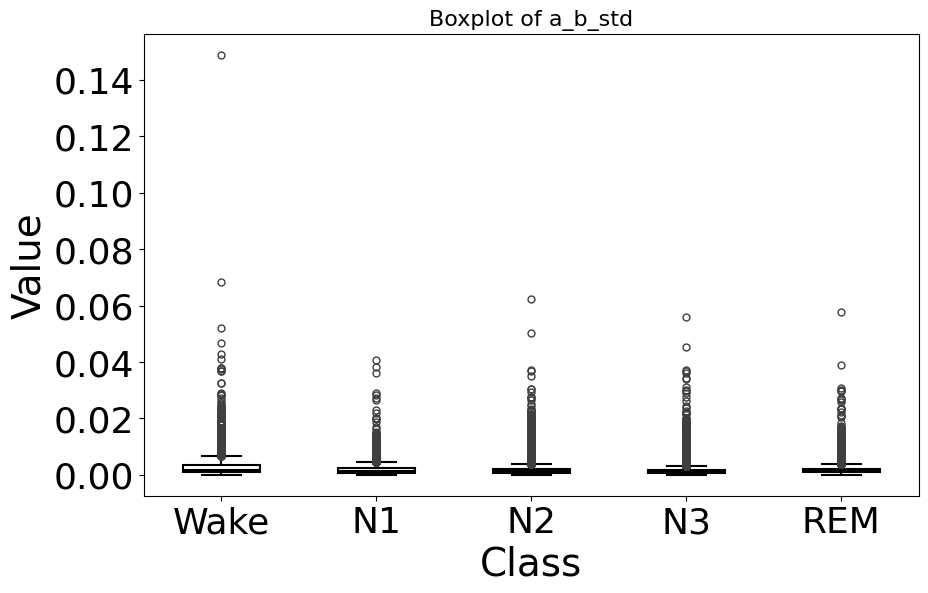

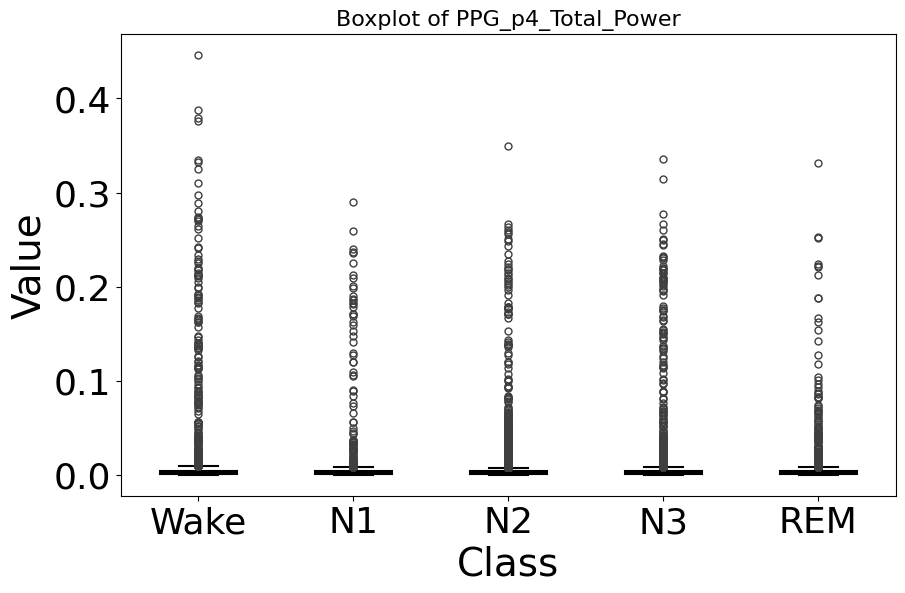

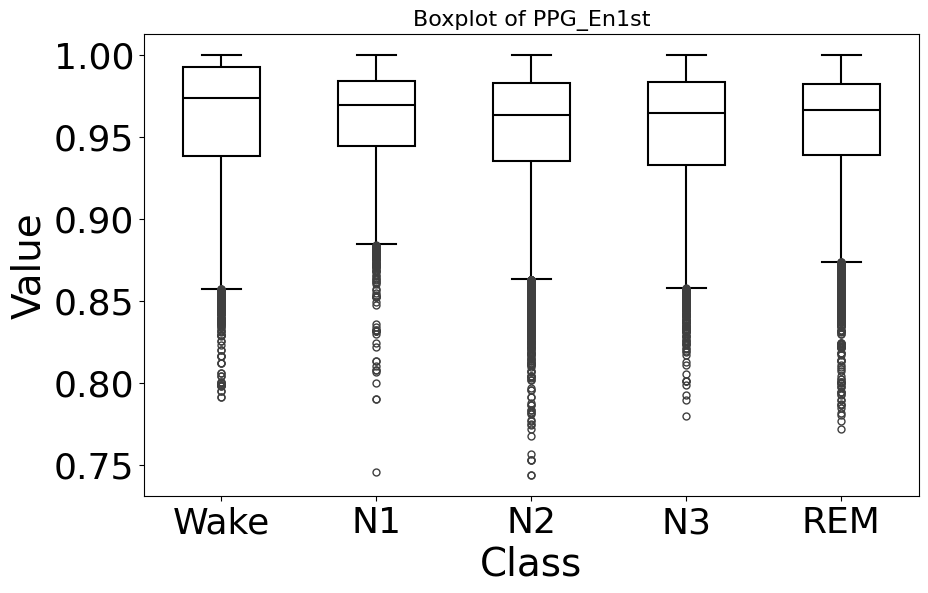

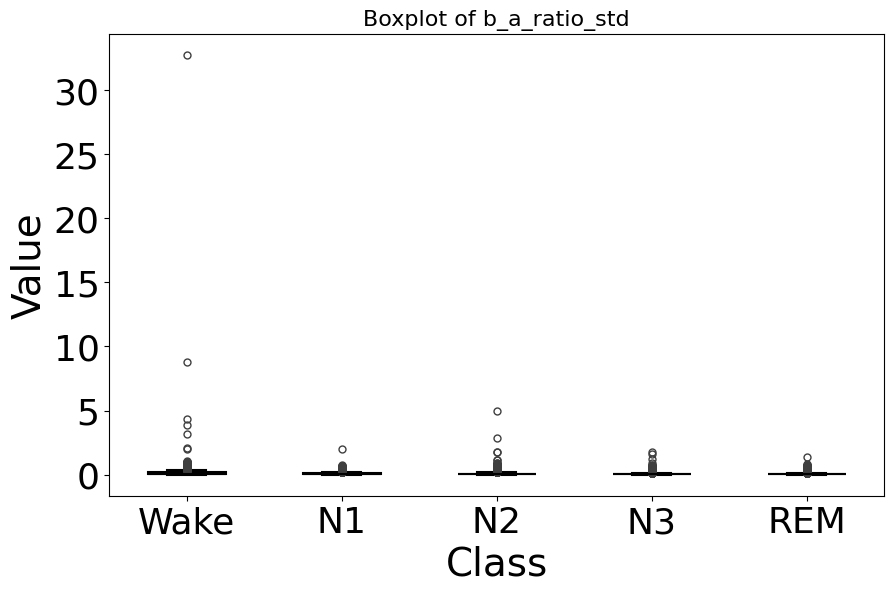

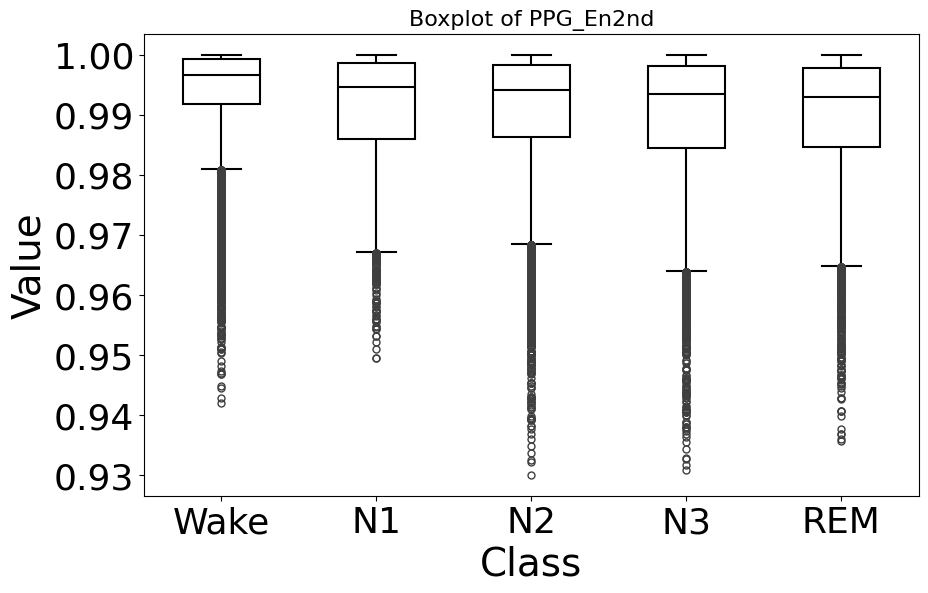

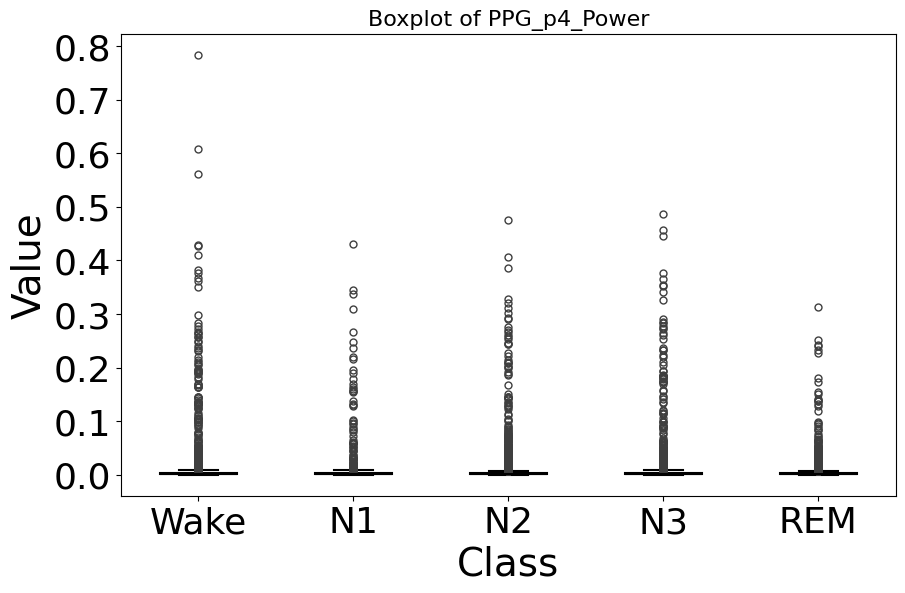

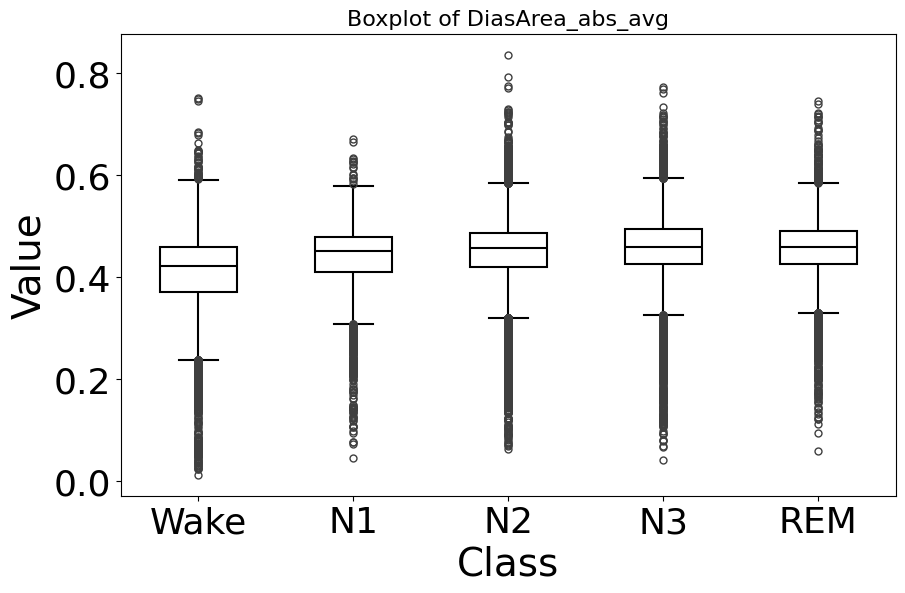

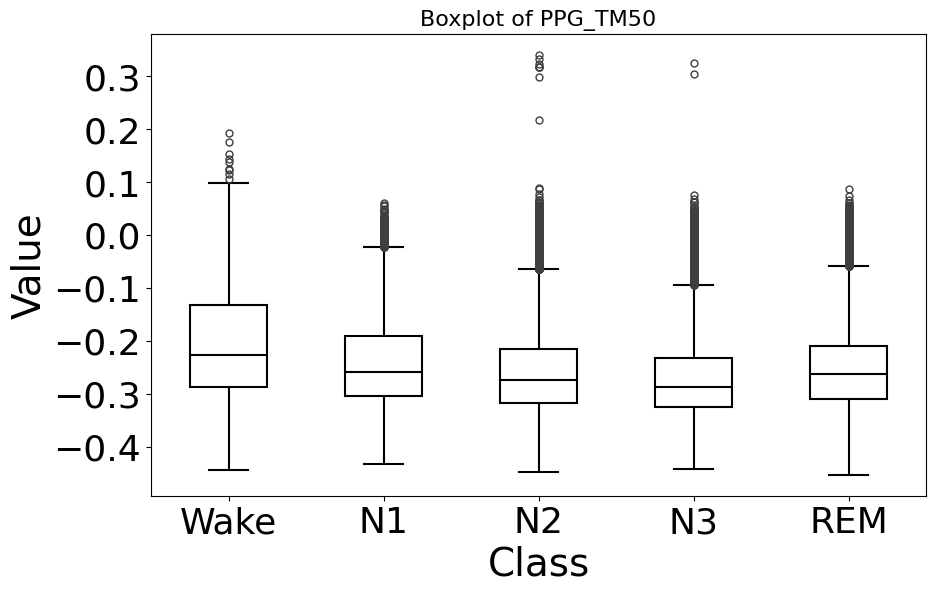

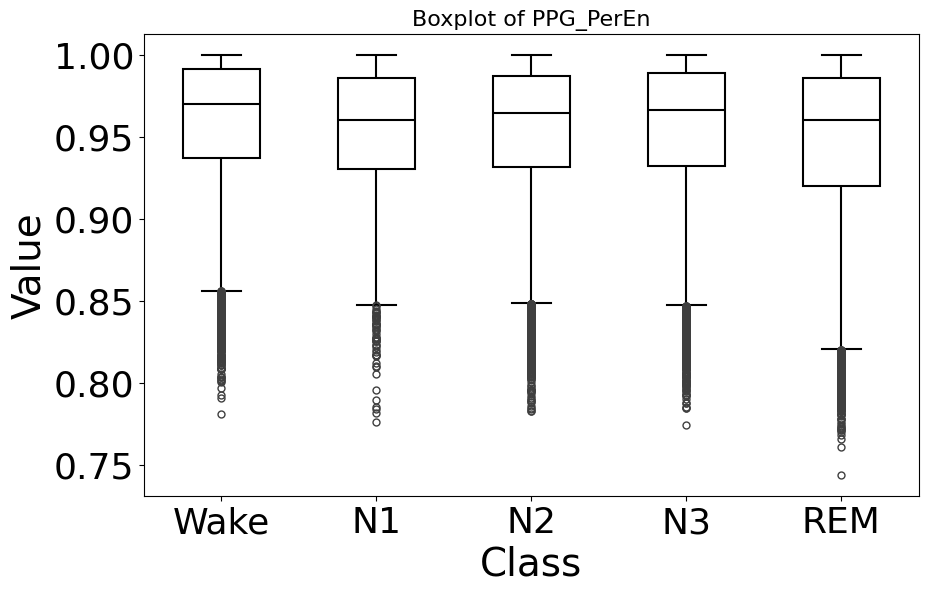

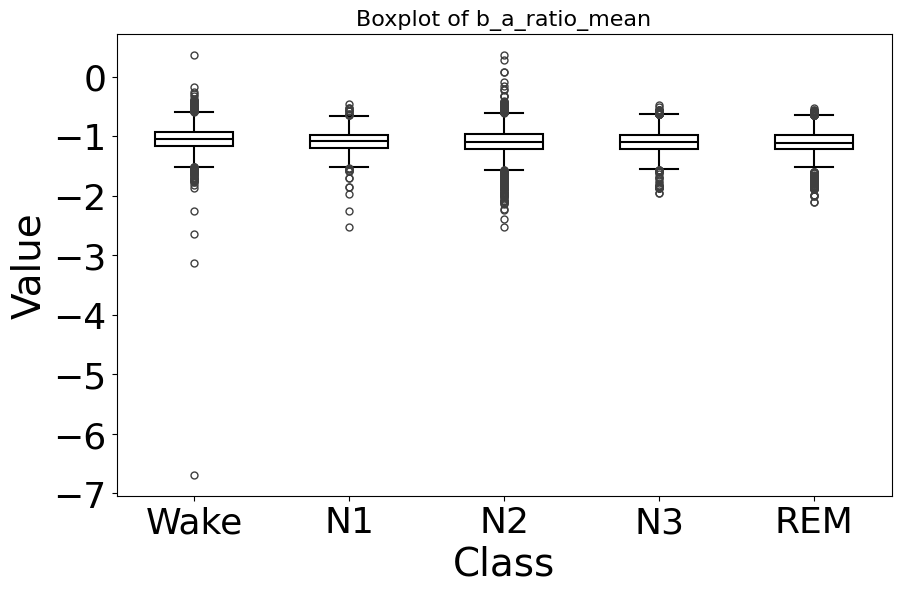

In [43]:
# First, map your 'class' column to the desired string labels
# Create a dictionary to map the class values to sleep stages
class_mapping = {0: "Wake", 1: "N1", 2: "N2", 3: "N3", 4: "REM"}

# Replace the numerical class labels in your DataFrame with the string labels
top_features['class'] = top_features['class'].map(class_mapping)

feature_names = top_features.drop(columns='class').columns  # assuming 'class' column exists

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,
                fliersize=5,
                linewidth=1.5,
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},
                whiskerprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'color': 'black'})

    plt.title(f'Boxplot of {feature}', fontsize=16)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)

    # Set x-ticks labels according to the class labels
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()


In [ ]:
top_features_class_3

,index,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Class 3 Average,Overall Importance (Mean)
0,33,e_a_ratio_mean,0.015461,0.019918,0.024926,0.020585,0.020223
1,25,RiseTime_TimeBetweenSysPeaks_Mean,0.012666,0.013110,0.012145,0.018868,0.014197
2,31,b_a_ratio_mean,0.012469,0.015528,0.015495,0.017029,0.015130
3,29,a_b_mean,0.013709,0.015789,0.015806,0.016577,0.015470
4,73,PPG_PerEn,0.012132,0.012852,0.012496,0.016512,0.013498
5,35,b_e_a_ratio_mean,0.012023,0.016824,0.017049,0.016172,0.015517
6,74,PPG_En1st,0.013281,0.016204,0.016466,0.016119,0.015518
7,17,RiseTime_FromHalfPeak_avg,0.012949,0.013217,0.013705,0.014068,0.013484
8,75,PPG_En2nd,0.015504,0.014669,0.016035,0.014023,0.015058
9,23,Width_10_Percent_Time_avg,0.015444,0.014568,0.014675,0.013905,0.014648
